4hr directional prediction testing vwap as a feature


*market return strongest inverse indicator........
vwap second

mean reversion and ROC trend/momentum only explanitory factors i can see

In [66]:
#libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
style.use ('ggplot')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from scipy.stats import skew
from scipy.stats import kurtosis

#Import BTCUSDTPERP 4HR Data here
df = pd.read_csv('BTC4HRML.csv', parse_dates = True, index_col=0)


#Note some metrics already included from tradingview to save calculations
df.head()

,open,high,low,close,MA,Smoothing Line,VWAP,VWAPUB,VWAPLB,ROC50,ROC100,ROC200,ROC400,BOLLINGERMID,BOLLINGERUpper,BOLLINGERLower
time,,,,,,,,,,,,,,,,
1567958400,10000.00,10357.53,10000.00,10340.12,NaN,NaN,10232.55000,10232.55000,10232.55000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567972800,10340.12,10412.65,10324.77,10391.63,NaN,NaN,10354.44481,10406.11810,10302.77151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567987200,10316.62,10316.68,10267.37,10297.89,NaN,NaN,10342.28475,10394.44344,10290.12606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568001600,10297.89,10316.34,10092.71,10149.47,NaN,NaN,10278.68072,10365.25990,10192.10154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568016000,10149.47,10475.54,10077.22,10414.60,NaN,NaN,10290.66743,10366.98432,10214.35055,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.shape

(5931, 16)

In [68]:
#we want to predict log return
df['Log Return'] = np.log(df.close) - np.log(df.close.shift(1))
df['Market Return'] = np.log(df['close'] / df['close'].shift(1))

In [69]:
#Make a binary classification filter showing if the days return was positive or negative

#Create an "empty" column as placeholder for our /position signals

df['Prediction'] = None

#Fill our newly created position column - we will buy (1) for an upper band break and go to 0 on a lower band break
        
for row in range(len(df)):
   
    if df['Log Return'].iloc[row]>0.000:
        df['Prediction'].iloc[row] = 1    
        
    if df['Log Return'].iloc[row]<=0.000:
        df['Prediction'].iloc[row] = -1
        

#Forward fill our prediction columnso that we know tomorrows outcome today (So we can train our ML algo knowing the desired outcome)
df['Prediction'].fillna(method='ffill',inplace=True)
df['Prediction']=df['Prediction'].shift(-1)


c:\users\sebus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Add some additional features:

#Short Run ROC (50,100,200,400 all in tradingview script)
df['ROC3']= np.log(df.close) - np.log(df.close.shift(3))
df['ROC6']= np.log(df.close) - np.log(df.close.shift(6))
df['ROC12']= np.log(df.close) - np.log(df.close.shift(12))


#percentile from mean features


#percentile from bollinger bands midpoint (20MA)

df['ratio20'] = df['close'] / df['BOLLINGERMID']
df['percentile20'] = df['ratio20'].rank(pct=True)


#Percentile from VWAP

df['ratioVWAP'] = df['close']/df['VWAP']
df['percentileVWAP'] = df['ratioVWAP'].rank(pct=True)

In [70]:
#Make a binary trend filter based on price compared to the 100 period moving average
df['Trend'] = None
#Fill our newly created trend column 
        
for row in range(len(df)):
   
    if df['close'].iloc[row]>df['MA'].iloc[row]:
        df['Trend'].iloc[row] = 1    
        
    if df['close'].iloc[row]<df['MA'].iloc[row]:
        df['Trend'].iloc[row] = -1       

#forward through time
df['Trend'].fillna(method='ffill',inplace=True)


In [71]:
#From tradingview - VWAP >/<

#Make a binary trend filter based on price compared to the VWAP
df['VWAPTrend'] = None
#Fill our newly created trend column 
        
for row in range(len(df)):
   
    if df['close'].iloc[row]>df['VWAP'].iloc[row]:
        df['VWAPTrend'].iloc[row] = 1    
        
    if df['close'].iloc[row]<df['VWAP'].iloc[row]:
        df['VWAPTrend'].iloc[row] = -1       

#forward through time
df['Trend'].fillna(method='ffill',inplace=True)


In [72]:
#Export to review and to avoid re running above feature creation

export_csv = df.to_csv (r'C:\Users\sebus\Machine Learning BTC\BTC2022MLTEST.csv', index = True, header=True)

In [73]:
#PART 2

#fit a machine learning model

#Data
df = pd.read_csv('BTC2022MLTEST.csv', parse_dates = True, index_col=0)

df3=df.fillna(0)

Index(['open', 'high', 'low', 'close', 'MA', 'Smoothing Line', 'VWAP',
       'VWAPUB', 'VWAPLB', 'ROC50', 'ROC100', 'ROC200', 'ROC400',
       'BOLLINGERMID', 'BOLLINGERUpper', 'BOLLINGERLower', 'Log Return',
       'Market Return', 'ROC3', 'ROC6', 'ROC12', 'ratio20', 'percentile20',
       'ratioVWAP', 'percentileVWAP', 'Prediction', 'Trend', 'VWAPTrend'],
      dtype='object')

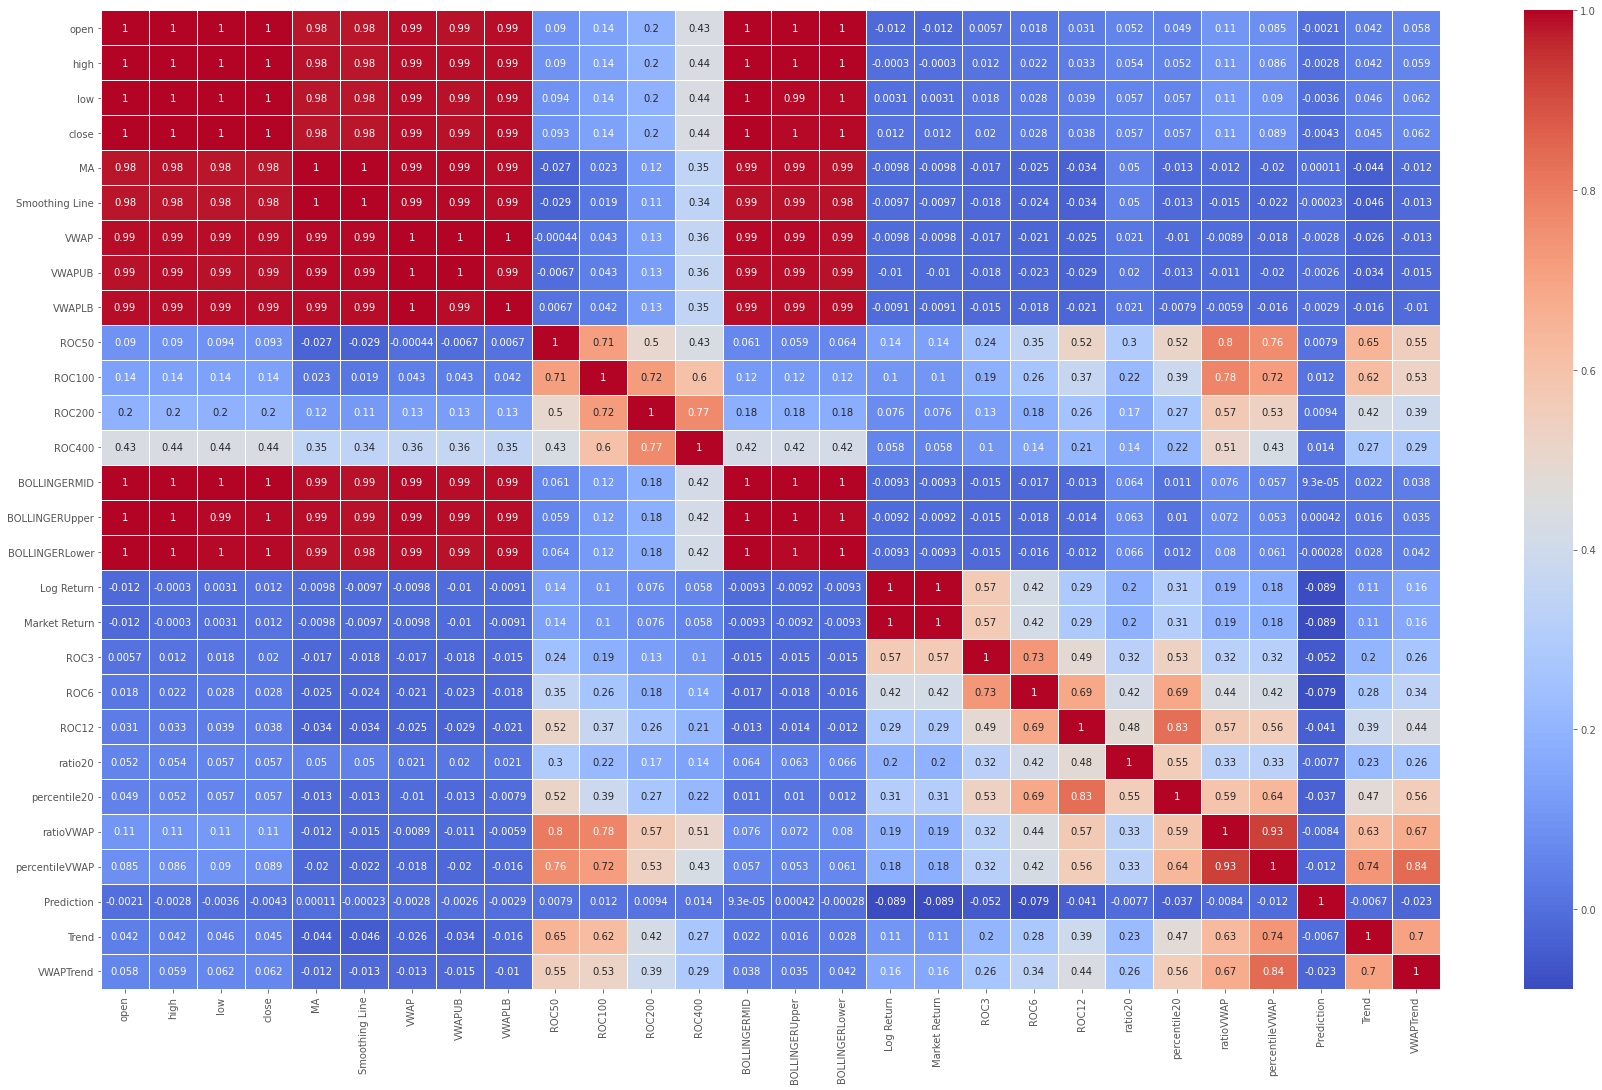

In [74]:
#Splitting the data
df_test = df3.loc['1625558400':'1653336000' ,:]  
df_train = df3.loc['1567958400':'1625544000',:] 

#Correlation map to help with feature selection
plt.figure(figsize = (30,18))
sns.heatmap(df_train.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')
df_train.columns

In [83]:
# Select features and separate features from output

y_train = df_train['Prediction']
X_train = df_train.loc[:,[  'Market Return', 'ROC50','ROC100', 'ROC200', 'ROC400', 'VWAPTrend', 
         'Trend', 'ROC6', 'percentile20',
        'percentileVWAP',
                     ]]

y_test = df_test['Prediction']
X_test = df_test.loc[:,[  'Market Return', 'ROC50','ROC100', 'ROC200', 'ROC400', 'VWAPTrend', 
         'Trend', 'ROC6',  'percentile20',
        'percentileVWAP',
                     ]]

#Normalizing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [84]:
#Check the shapes and classes of our train and test sets

print(X_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == -1)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

print(X_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == -1)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(1930, 10)
(1930,)
% of Class0 : 0.496891 y_test
% of Class1 : 0.503109 y_test
(4000, 10)
(4000,)
% of Class0 : 0.485000 y_train
% of Class1 : 0.515000 y_train


In [85]:
# Define Model and fit

clf = ensemble.GradientBoostingClassifier(verbose=3)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3800            0.99s
         2           1.3756            0.93s
         3           1.3714            0.91s
         4           1.3684            0.86s
         5           1.3652            0.86s
         6           1.3630            0.83s
         7           1.3606            0.82s
         8           1.3581            0.82s
         9           1.3555            0.80s
        10           1.3535            0.79s
        11           1.3513            0.78s
        12           1.3498            0.77s
        13           1.3479            0.76s
        14           1.3461            0.75s
        15           1.3445            0.75s
        16           1.3430            0.74s
        17           1.3422            0.73s
        18           1.3403            0.70s
        19           1.3390            0.70s
        20           1.3377            0.70s
        21           1.3366            0.69s
        2

GradientBoostingClassifier(verbose=3)

In [86]:
#Check our training accuracy
accuracy = clf.score(X_train, y_train)
print('Training Accuracy: %f' % accuracy)

Training Accuracy: 0.679750


In [87]:
#Make our predications

pred = clf.predict(X_test)

In [88]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

print(cm)

[[414 545]
 [363 608]]


In [89]:
#Area under the curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.52892914327811

In [90]:
#Check actual accuracy of predictions
accuracy = clf.score(X_test, y_test)
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.529534


In [2]:
#Calculate directional performance metrics by importing original data, adding prediction column and runing metrics below



"""
df['MLReturn'] = df['Market Return']*df['Predlist'].shift(1)-0.0001#<this is the adjustment for trading costs
df['Index Return'] = (1 + df['MLReturn']).cumprod()
lookback = 1000
df['rolling_max'] = df['Index Return'].rolling(lookback, min_periods=1).max()
df['daily_drawdown'] = df['Index Return']/df['rolling_max'] - 1.0
df['max_daily_drawdown'] = df['daily_drawdown'].rolling(lookback, min_periods=1).min()
Return = df['MLReturn'].sum()
Number_of_Days = len(df.index)
CAGR = ((df['MLReturn'].sum())/Number_of_Days)*252


#Print and Plot

print("Total Return =",Return)
print("% of Time in Market = 100%")
print("CAGR =",CAGR)
print("Maximum Drawdown = ", df['max_daily_drawdown'].min())

#Plot the strategy returns
df['MLReturn'].cumsum().plot()
plt.title("Machine Learning Directional Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
"""

'\ndf[\'MLReturn\'] = df[\'Market Return\']*df[\'Predlist\'].shift(1)-0.0001#<this is the adjustment for trading costs\ndf[\'Index Return\'] = (1 + df[\'MLReturn\']).cumprod()\nlookback = 1000\ndf[\'rolling_max\'] = df[\'Index Return\'].rolling(lookback, min_periods=1).max()\ndf[\'daily_drawdown\'] = df[\'Index Return\']/df[\'rolling_max\'] - 1.0\ndf[\'max_daily_drawdown\'] = df[\'daily_drawdown\'].rolling(lookback, min_periods=1).min()\nReturn = df[\'MLReturn\'].sum()\nNumber_of_Days = len(df.index)\nCAGR = ((df[\'MLReturn\'].sum())/Number_of_Days)*252\n\n\n#Print and Plot\n\nprint("Total Return =",Return)\nprint("% of Time in Market = 100%")\nprint("CAGR =",CAGR)\nprint("Maximum Drawdown = ", df[\'max_daily_drawdown\'].min())\n\n#Plot the strategy returns\ndf[\'MLReturn\'].cumsum().plot()\nplt.title("Machine Learning Directional Returns")\nplt.xlabel("Date")\nplt.ylabel("Returns")\nplt.legend()\n'

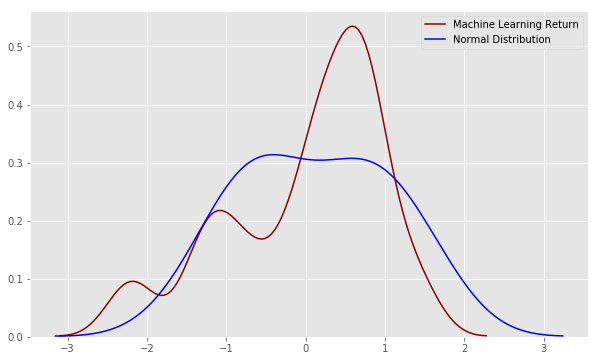

In [110]:
#Make a KDE plot to examine tails and density

"""
returns = np.log(df['Index Return']).diff().dropna()
standard_return = (returns-returns.mean())/returns.std()

plt.figure(figsize=(10,6))
sns.kdeplot(standard_return, label="Machine Learning Return", bw=0.30, color='darkred')
sns.kdeplot(np.random.normal(size=len(df)), label="Normal Distribution", color = 'blue')

In [26]:
"""
#Calculate Sharpe
dailysharpe = df['MLReturn'].mean()/df['MLReturn'].std()#Daily Sharpe Ratio
SharpeRatio = dailysharpe*(252**0.5)#Annualized Sharpe (daily sharpe by square root of number of trading days per year)
print("Sharpe Ratio = ", SharpeRatio)

#Calculate Volatility
volatility = df['MLReturn'].std()
Annualised_Vol = volatility*(252**0.5)
print("Volatility = ",Annualised_Vol)

skew1 = skew(df['MLReturn'].dropna())
print("Skew",skew1)

kurtosis1 = kurtosis(df['MLReturn'].dropna())
print("Kurtosis", kurtosis1)

Sharpe Ratio =  -0.49634076894937385
Volatility =  0.050240447646058596
Skew -0.8388732041354475
Kurtosis 1.8255544323888433


In [27]:
"""
df.sort_values('MLReturn',inplace=True, ascending=True)
VAR_95=df['MLReturn'].quantile(0.05)
VAR_99=df['MLReturn'].quantile(0.01)
VAR_999=df['MLReturn'].quantile(0.001)

print("VAR at 95% confidence level = ", VAR_95)
print("VAR at 99% confidence level = ", VAR_99)
print("VAR at 99.9% confidence level = ", VAR_999)

#Here we can say that we can be 99% certain losses will not exceed .68% in a 1 day timeframe although with such small sample size this is mostly irrelevant

#Note .0068 is 0.68% ie less than 1% - not 68%

VAR at 95% confidence level =  -0.004350182739832262
VAR at 99% confidence level =  -0.008913444479317911
VAR at 99.9% confidence level =  -0.010779206347211752
